## Universidad Autonoma de Nuevo León
## Facultad de Ciencias Físico Matemáticas
### Maestría en Ciencia de Datos
### Aprendizaje Automático
#### Eduardo David González Flores
##### 1515489

## Tarea (8 puntos)
- Calcula estadísticos descriptivos básicos para tus datos
- Haz una matriz de correlación de tus datos y escribe algunas interpretaciones de la misma
- Realiza alguna prueba de hipótesis a partir de las conclusiones que hayas sacado de la matriz de correlación
- Presenta tus resultados gráficamente

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '../data/churn.csv'

df = pd.read_csv(file_path)
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Estadísticos descriptivos

In [2]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


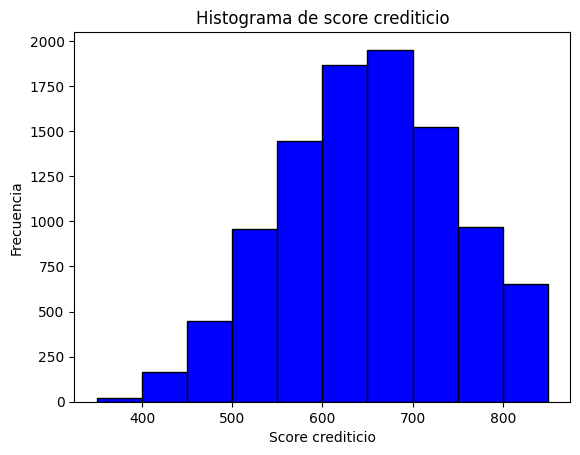

In [8]:
plt.hist(df['credit_score'], bins=10, color='blue', edgecolor='black')

plt.xlabel('Score crediticio')
plt.ylabel('Frecuencia')
plt.title('Histograma de score crediticio')

plt.show()

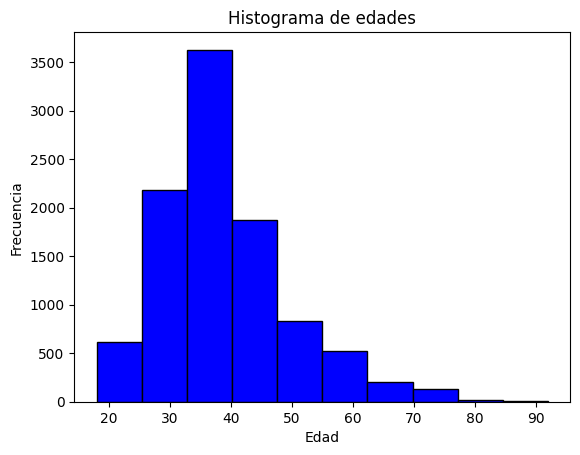

In [9]:
plt.hist(df['age'], bins=10, color='blue', edgecolor='black')

plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de edades')

plt.show()


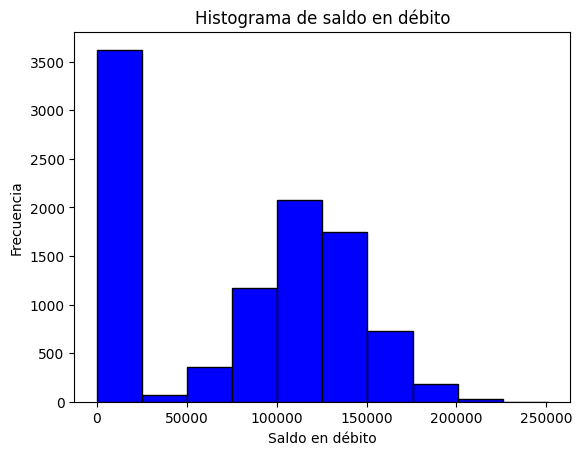

In [10]:
plt.hist(df['balance'], bins=10, color='blue', edgecolor='black')

plt.xlabel('Saldo en débito')
plt.ylabel('Frecuencia')
plt.title('Histograma de saldo en débito')

plt.show()


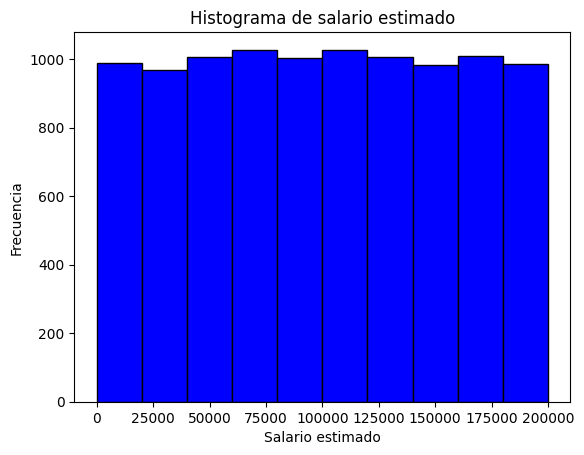

In [11]:
plt.hist(df['estimated_salary'], bins=10, color='blue', edgecolor='black')

plt.xlabel('Salario estimado')
plt.ylabel('Frecuencia')
plt.title('Histograma de salario estimado')

plt.show()


In [16]:
df['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [23]:
df['tenure'].value_counts()

<bound method Series.sort_values of 2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: tenure, dtype: int64>

In [17]:
df['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [13]:
df['products_number'].value_counts()

1    5084
2    4590
3     266
4      60
Name: products_number, dtype: int64

In [14]:
df['credit_card'].value_counts()

1    7055
0    2945
Name: credit_card, dtype: int64

In [15]:
df['active_member'].value_counts()

1    5151
0    4849
Name: active_member, dtype: int64

# Matriz de correlación

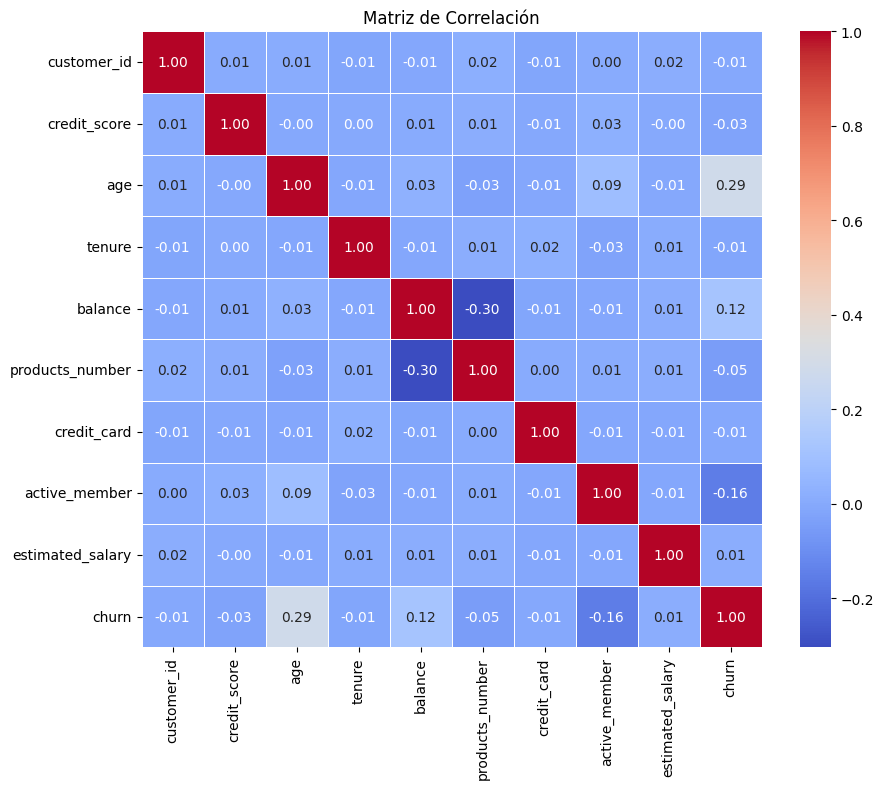

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


# Conclusiones matriz de correlación

1. **customer_id**: La variable `customer_id` tiene una correlación muy cercana a cero con todas las demás variables. Esto era de esperar, ya que se trata de un identificador único para cada cliente y no debería tener una correlación sustancial con otras características.

2. **credit_score**: La puntuación de crédito (`credit_score`) muestra correlaciones débiles con la mayoría de las variables, lo que sugiere que no hay una relación lineal fuerte con otras características.

3. **age**: La edad (`age`) muestra una correlación positiva moderada con la variable `churn`, lo que sugiere que los clientes más jóvenes pueden estar más inclinados a abandonar el servicio. También muestra una correlación positiva con la variable `active_member`, lo que indica que los clientes más jóvenes pueden estar más activos en el uso de servicios bancarios.

4. **balance**: El saldo (`balance`) tiene una correlación positiva moderada con la variable `churn`, lo que sugiere que los clientes con saldos más altos pueden ser menos propensos a abandonar. Además, muestra una correlación negativa moderada con la variable `products_number`, lo que indica que los clientes con saldos más altos pueden tener menos productos financieros.

5. **products_number**: El número de productos financieros (`products_number`) muestra una correlación negativa moderada con la variable `balance`, lo que sugiere que los clientes con más productos financieros pueden tener saldos más bajos.

6. **credit_card**: La posesión de una tarjeta de crédito (`credit_card`) no muestra correlaciones fuertes con otras variables en la matriz.

7. **active_member**: La variable `active_member` tiene una correlación negativa moderada con la variable `churn`, lo que indica que los clientes inactivos pueden ser más propensos a abandonar.

8. **estimated_salary**: La estimación del salario (`estimated_salary`) no muestra correlaciones fuertes con otras variables en la matriz.

9. **churn**: La variable `churn` muestra correlaciones moderadas con las variables `age` (positiva) y `balance` (positiva), lo que sugiere que la edad y el saldo pueden influir en la probabilidad de abandono. También muestra una correlación negativa moderada con la variable `active_member`, lo que indica que los clientes inactivos pueden ser más propensos a abandonar.


# Prueba de hipótesis

Hipótesis Nula (H0): No hay correlación significativa entre la edad (age) y el abandono (churn).

Hipótesis Alternativa (H1): Existe una correlación significativa entre la edad (age) y el abandono (churn).

In [6]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df['age'], df['churn'])

alpha = 0.05

print(f'Coeficiente de correlación de Pearson: {corr:.4f}')
print(f'Valor p (p-value): {p_value:.4f}')

if p_value < alpha:
    print("Rechazamos la hipótesis nula (H0). Existe una correlación significativa.")
else:
    print("No podemos rechazar la hipótesis nula. No hay evidencia de una correlación significativa.")


Coeficiente de correlación de Pearson: 0.2853
Valor p (p-value): 0.0000
Rechazamos la hipótesis nula (H0). Existe una correlación significativa.


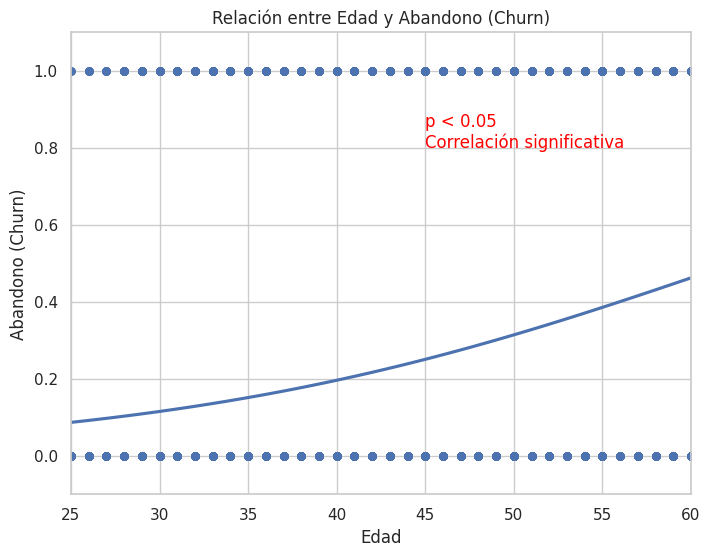

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.regplot(x='age', y='churn', data=df, logistic=True, ci=None, scatter_kws={'s': 25})

if p_value < alpha:
    plt.text(45, 0.8, f'p < {alpha}\nCorrelación significativa', fontsize=12, color='red')
else:
    plt.text(45, 0.8, f'p = {p_value:.4f}\nNo hay correlación significativa', fontsize=12, color='green')

plt.title('Relación entre Edad y Abandono (Churn)')
plt.xlabel('Edad')
plt.ylabel('Abandono (Churn)')
plt.ylim(-0.1, 1.1)
plt.xlim(25, 60)

plt.show()
